In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [85]:
dataset = pd.read_csv('0.csv',index_col="time",parse_dates=True)
df = pd.read_csv('data_by_id/0.csv', index_col="time",parse_dates=True)

In [86]:
column = dataset['factor_analyzed'].count()

print(column)

4553


In [87]:
dataset.head()

,factor_analyzed
time,
1999-11-19,-0.024039
1999-11-22,-0.002937
1999-11-23,0.019593
1999-11-24,0.047962
1999-11-26,0.116235


In [88]:
dataset.isna().any()

factor_analyzed    False
dtype: bool

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4553 entries, 1999-11-19 to 2017-12-22
Data columns (total 1 columns):
factor_analyzed    4553 non-null float64
dtypes: float64(1)
memory usage: 71.1 KB


In [105]:
#training_set=dataset['factor_analyzed']
#training_set=pd.DataFrame(training_set)
#training=df['adjusted_open']
#training=pd.DataFrame(training)
# Feature Scaling
#sc = MinMaxScaler(feature_range = (0, 1))
#training_set_scaled = sc.fit_transform(training_set)
#training_scaled=sc.fit_transform(training)

#training_set_scaled.plot(figsize=(16,6))
#training_scaled.plot(figsize=(16,6))

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4553 entries, 1999-11-19 to 2017-12-22
Data columns (total 1 columns):
factor_analyzed    4553 non-null float64
dtypes: float64(1)
memory usage: 71.1 KB


In [107]:
training_set=dataset['factor_analyzed']
training_set=pd.DataFrame(training_set)

In [108]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [110]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, column-100):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [111]:
# Initialising the RNN
regressor = Sequential()

In [112]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [113]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
4393/4393 [==============================] - 13s 3ms/step - loss: 0.0039
Epoch 2/10
4393/4393 [==============================] - 10s 2ms/step - loss: 0.0014
Epoch 3/10
4393/4393 [==============================] - 11s 2ms/step - loss: 0.0013
Epoch 4/10
4393/4393 [==============================] - 9s 2ms/step - loss: 0.0011
Epoch 5/10
4393/4393 [==============================] - 9s 2ms/step - loss: 9.1034e-04
Epoch 6/10
4393/4393 [==============================] - 11s 2ms/step - loss: 8.5018e-04
Epoch 7/10
4393/4393 [==============================] - 11s 3ms/step - loss: 7.8031e-04
Epoch 8/10
4393/4393 [==============================] - 10s 2ms/step - loss: 8.1629e-04
Epoch 9/10
4393/4393 [==============================] - 10s 2ms/step - loss: 6.9650e-04
Epoch 10/10
4393/4393 [==============================] - 11s 2ms/step - loss: 6.9959e-04


In [ ]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
#dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [120]:
X_test = []
for i in range(column-100, column):
    X_test.append(training_set_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [121]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
0    100 non-null float32
dtypes: float32(1)
memory usage: 480.0 bytes


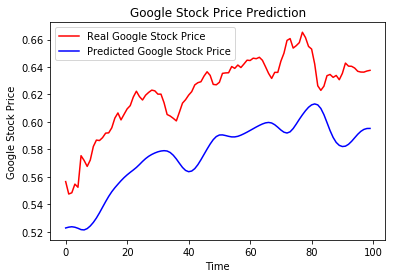

In [122]:
# Visualising the results
plt.plot(training_set_scaled[column-100:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()